In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,recall_score,precision_score

# Load data

In [4]:
path = 'yelp_data/health_text_sentiment.csv'
df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

df = df[['stars','text',
 'clean_text']]

## select 1 & 5 stars

In [5]:
data = df.ix[np.where((df.stars==1)|(df.stars==5))]
# data.stars.replace(1,0,inplace=True)
# data.stars.replace(5,1,inplace=True)

data.head()

,stars,text,clean_text
0,1,Please stay away from this place if you can! I...,please stay away place bad care imaginable sta...
1,5,My husband has been a patient of Dr. Byrne for...,husband patient dr byrne last year half last m...
4,1,I wish I could give 0 stars. Worst office I've...,wish could give star bad office ever horrible ...
5,1,I went to the emergency room because i was hav...,go emergency room kidney stone attack emergenc...
6,5,Dr. Byrne is an excellent doctor with all the ...,dr byrne excellent doctor right skill include ...


## split


In [7]:
# split
X = data['text'].values.astype(str)
Xc = data['clean_text'].values.astype(str)

y = data['stars'].values

## train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## CountVectorizer

In [13]:
count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

## TfidfVectorizer

In [14]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Multinimial NB: CountVectorizer

In [71]:
mn_count_clf = MultinomialNB()

mn_count_clf.fit(count_train, y_train)
pred = mn_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.957


In [72]:
alpha_results = dict()

alpha_values = np.arange(0,1.1,.1)
alpha_values = np.around(alpha_values, decimals=2)
alpha_values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [73]:
last_score = 0
for alpha in alpha_values:
    mn_count_clf = MultinomialNB(alpha=alpha)
    mn_count_clf.fit(count_train, y_train)
    pred = mn_count_clf.predict(count_test)
    score = metrics.accuracy_score(y_test, pred)
    
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))
    alpha_results[alpha] = score

Alpha: 0.00 Score: 0.91357
Alpha: 0.10 Score: 0.95628
Alpha: 0.20 Score: 0.95696
Alpha: 0.30 Score: 0.95741
Alpha: 0.40 Score: 0.95713
Alpha: 0.50 Score: 0.95729
Alpha: 0.60 Score: 0.95735
Alpha: 0.70 Score: 0.95741
Alpha: 0.80 Score: 0.95707
Alpha: 0.90 Score: 0.95701
Alpha: 1.00 Score: 0.95684


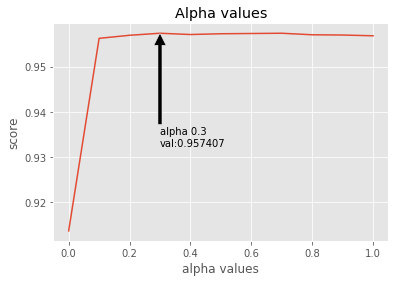

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111)

x=list(alpha_results.keys())
y=list(alpha_results.values())
line, = ax.plot(x, y)

ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
value = 'alpha 0.{}\nval:{:3f}'.format(xpos,ymax)
ax.annotate(value, xy=(xmax, ymax),
            arrowprops=dict(facecolor='black'), xytext=(xmax, ymax-.025)
            )
plt.title('Alpha values')
plt.xlabel('alpha values')
plt.ylabel('score')
plt.show()

In [75]:
mn_count_clf = MultinomialNB(alpha=0.3)

mn_count_clf.fit(count_train, y_train)
pred = mn_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.957


In [76]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.93      0.96      0.95      7241
           5       0.97      0.95      0.96     10485

   micro avg       0.96      0.96      0.96     17726
   macro avg       0.95      0.96      0.96     17726
weighted avg       0.96      0.96      0.96     17726



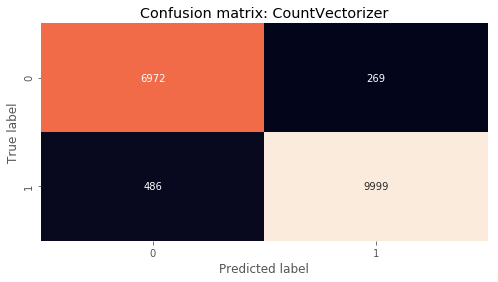

In [77]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion matrix: CountVectorizer')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Multinimial NB: TfidfVectorizer

In [78]:
mn_tfidf_clf = MultinomialNB()
mn_tfidf_clf.fit(tfidf_train, y_train)
pred = mn_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.959


## alpha values

In [80]:
alpha_results = dict()
alpha_values = np.arange(0,1.1,.1)
alpha_values = np.around(alpha_values, decimals=2)
alpha_values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [81]:
for alpha in alpha_values:
    mn_tfidf_clf = MultinomialNB(alpha=alpha)

    mn_tfidf_clf.fit(tfidf_train, y_train)
    pred = mn_tfidf_clf.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))
    alpha_results[alpha] = score

Alpha: 0.00 Score: 0.89253
Alpha: 0.10 Score: 0.95628
Alpha: 0.20 Score: 0.95791
Alpha: 0.30 Score: 0.95854
Alpha: 0.40 Score: 0.95899
Alpha: 0.50 Score: 0.95916
Alpha: 0.60 Score: 0.95955
Alpha: 0.70 Score: 0.95904
Alpha: 0.80 Score: 0.95893
Alpha: 0.90 Score: 0.95927
Alpha: 1.00 Score: 0.95865


## Plot best alpha value

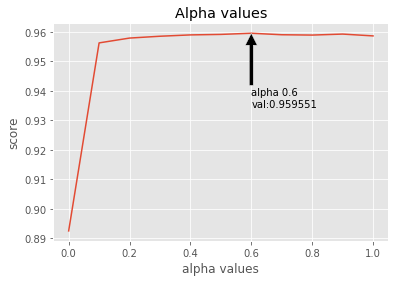

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)

x=list(alpha_results.keys())
y=list(alpha_results.values())
line, = ax.plot(x, y)

ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
value = 'alpha 0.{}\nval:{:3f}'.format(xpos,ymax)
ax.annotate(value, xy=(xmax, ymax),
            arrowprops=dict(facecolor='black'), xytext=(xmax, ymax-.025)
            )
plt.title('Alpha values')
plt.xlabel('alpha values')
plt.ylabel('score')
plt.show()

In [83]:
mn_tfidf_clf = MultinomialNB(alpha=0.6)
mn_tfidf_clf.fit(tfidf_train, y_train)
pred = mn_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.960


In [84]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95      7241
           5       0.96      0.97      0.97     10485

   micro avg       0.96      0.96      0.96     17726
   macro avg       0.96      0.96      0.96     17726
weighted avg       0.96      0.96      0.96     17726



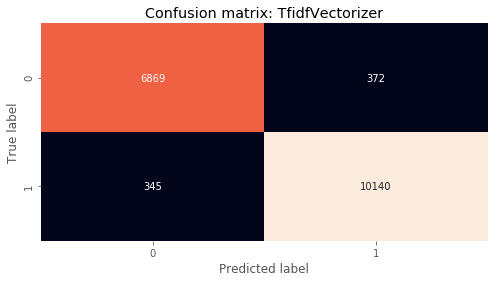

In [86]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion matrix: TfidfVectorizer')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()